# MLB Salary Analysis

**In the following analysis, I will delve deeper into the age-old debate whether big spending MLB teams win more games than their lower spending competitors.**

The economics of MLB has changed over the course of history with certain structural changes and events shaping the game as it exists today; including the addition of more teams (30 today vs. 24 in 1976), free agency (1976), the ownership collusion scandal (1985-1987), and the Collective Bargaining Agreement (2006).  

In 2001 and 2002 “Moneyball” was introduced into the game by the Oakland Athletics which utilized big data structures and statistical analysis that re-wrote how risk and value, as applied to prospects, was modeled and optimized.  One question that is always being asked is "Are we paying too much for each win?"

Predictably, MLB team salaries have increased markedly since 1985, the period I will analyze.  In-turn, cost-per-win has increased with expanding payrolls.  To determine if cost-per-win is statistically significant in predicting team wins and playoff appearances, I will seek to answer the following three questions:

1) Is there a correlation between team salary & wins?

2) Is there a correlation between team salary and making the playoffs?

3) Is there a clear gap between the spending of teams that made the playoffs vs. teams that didn't make the playoffs?

I anticipate the visualization of data to expose several outliers analyzing the payrolls of big market teams (New York Yankees, Boston Red Sox) versus mid-market teams (Kansas City Royals, Baltimore Orioles), and small-market teams (Miami Marlins, Houston Astros).  The sample sizes of teams making the playoffs versus teams that do not make the playoffs (10 vs. 20 in 2015) may also affect the outcome.

## Hypothesis

**Hypothesis:** The more a team spends, the likelihood of winning games and making the playoffs increases.

**Independent variable:** salary

**Dependent variables:** wins, playoff appearances


## Imports

In [1]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import f_oneway

batting = pd.read_csv('csvs/Batting.csv')
master = pd.read_csv('csvs/Master.csv')
salary = pd.read_csv('csvs/Salaries.csv')
pitching = pd.read_csv('csvs/Pitching.csv')
team = pd.read_csv('csvs/Teams.csv')

Populating the interactive namespace from numpy and matplotlib


## DataFrame Creation

In [2]:
# added a column to the DataFrame that converts playoff teams 'Y' & 'N' to either 1 or 0

team_salaries = salary.groupby(['yearID', 'teamID'], as_index=False).sum()
team = team[team['yearID'] >= 1985]
team = team.merge(team_salaries)

playoff_teams = team[(team['DivWin'] == 'Y') | (team['WCWin'] == 'Y')]

team = team.assign(salary_per_win = lambda x: x.salary / x.W)
team = team.assign(made_playoffs = lambda x: (x.DivWin == 'Y') | (x.WCWin == 'Y'))
team['made_playoffs'] = team['made_playoffs'].astype(int)

## Q1:  Is there a correlation between team salary & wins?

In [3]:
### print team[['yearID', 'franchID', 'W', 'salary', 'salary_per_win', 'made_playoffs']].sort('salary', ascending=False)
columns = ['yearID', 'franchID', 'W', 'salary', 'salary_per_win', 'made_playoffs']


### print team[team['yearID'] == 2015].sort_values('salary', ascending=False)[columns]

print team[(team['yearID'] == 1985) | (team['yearID'] == 2015)] \
    .sort_values(['yearID', 'salary'], ascending=False)[columns]

     yearID franchID    W     salary  salary_per_win  made_playoffs
883    2015      LAD   92  215792000    2.345565e+06              1
864    2015      NYY   87  212751957    2.445425e+06              1
867    2015      BOS   78  181103400    2.321838e+06              0
862    2015      DET   74  172284750    2.328172e+06              0
884    2015      SFG   84  164701500    1.960732e+06              0
879    2015      WSN   83  155587472    1.874548e+06              0
868    2015      TEX   88  143742789    1.633441e+06              1
871    2015      SEA   76  122208700    1.608009e+06              0
870    2015      ANA   85  120005415    1.411828e+06              0
873    2015      STL  100  119241500    1.192415e+06              1
886    2015      SDP   74  118441300    1.600558e+06              0
875    2015      CHC   97  115879310    1.194632e+06              1
865    2015      BAL   81  115044833    1.420307e+06              0
877    2015      CIN   64  113072286    1.766754

**Correlation coefficient**: a number between −1 and +1 calculated to represent the linear dependence of two variables or sets of data.

In this case I calculate **Pearson's r** (the covariance of the variables divided by the product of their standard deviations) to calculate the strength and direction of the linear relationship between salary and wins.

The following calculations show an overall relationship between salary and wins, less strong between 1985 - 1995, although correlation is there, and stronger in the late 90's and early 00's.


In [4]:
# function to calculate correlation coefficient by year

def correlation(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

def correlation_by_year(d,y):
    return correlation(d[d['yearID'] == y]['salary'],d[d['yearID'] == y]['W'])

### example of correlation in 1999
### print correlation_by_year(team, 1999)

# remove strike-shortened season 1994
years = range(1985, 2016)
years.remove(1994)

correlations = []

# iterate over dataframe, append to list
for y in years:
    print "Year: " + str(y) + " " + str(correlation_by_year(team, y))
    correlations.append(correlation_by_year(team, y))

Year: 1985 0.34205517452
Year: 1986 0.210318923388
Year: 1987 -0.0561760591347
Year: 1988 0.162257784516
Year: 1989 0.34052664272
Year: 1990 0.0016587832611
Year: 1991 0.233452563366
Year: 1992 0.0326815792365
Year: 1993 0.352641213608
Year: 1995 0.3266298284
Year: 1996 0.549982298357
Year: 1997 0.440002899804
Year: 1998 0.658006395448
Year: 1999 0.56393952032
Year: 2000 0.331089731766
Year: 2001 0.320648041884
Year: 2002 0.442415527385
Year: 2003 0.418703514233
Year: 2004 0.54101480514
Year: 2005 0.49106954664
Year: 2006 0.53627598009
Year: 2007 0.491055282798
Year: 2008 0.32697333856
Year: 2009 0.4763102635
Year: 2010 0.368869433157
Year: 2011 0.409202916437
Year: 2012 0.190056680031
Year: 2013 0.299579448546
Year: 2014 0.322432582587
Year: 2015 0.238783487589


**Graph**: The folloiwng visualizaiton represents a clear, positive correlation between salary and wins.  The closer to zero indicates no correlation, and we can see only three years in which this is the case.  Otherwise we see a positive correlation.

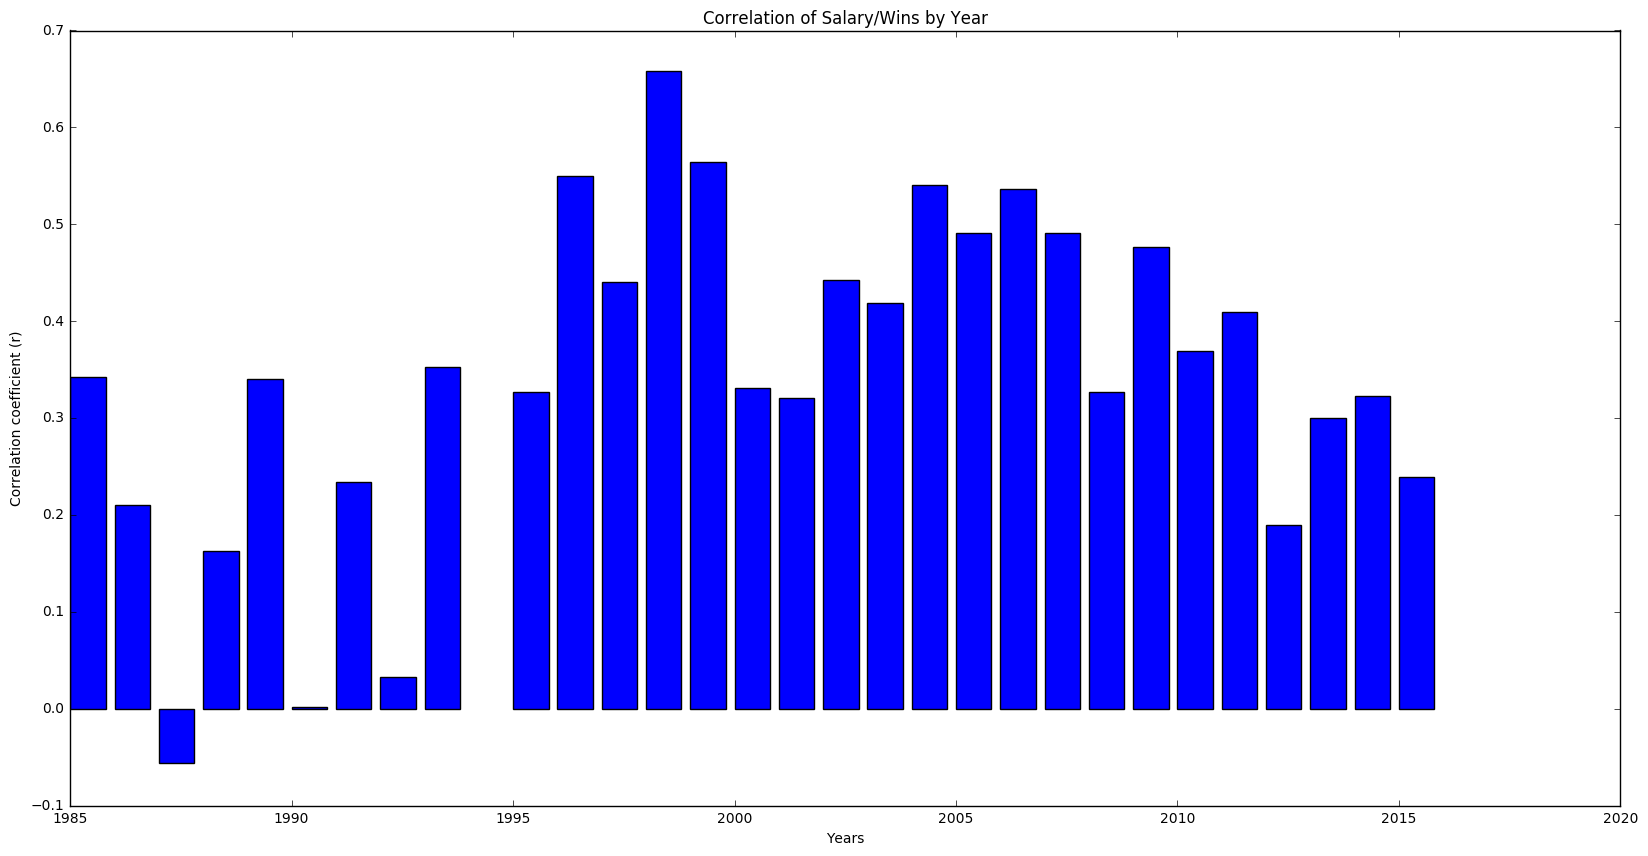

In [5]:
# plot the correlation
plt.figure(figsize= (20,10))
plt.bar(years, correlations)

plt.xlabel('Years')
plt.ylabel('Correlation coefficient (r)')
plt.title('Correlation of Salary/Wins by Year')
plt.show()

## P-value test

Explain what a p-value is & why use below code?

p-value determines if the null hypothesis holds or falls apart

The null hypothesis stats there is no relationship between salary/wins

if p-value > .05, we accept the null hypothesis & determine there is no significance

if p-value < .05, we reject the null hypothesis & determine there is significant relationship

therefore we reject the null hypothesis in this case as the p-value is effectively zero

In [6]:
### Code for the p-value? 3.47 x 10 -264 is v close to 0 so strong correlation determining the "significance"



scipy.stats.f_oneway(team['salary'], team['W'])

F_onewayResult(statistic=1727.1197928699726, pvalue=3.4743011804588243e-264)

### What findings tell us about result?

## Q2:  Is there a correlation between team salary and making the playoffs?

### Explain these numbers. Is there a correlation between a team's salary and making the playoffs? Was the correlation stronger in certain years than other years? Any reason for this? Maybe there's a bit of randomness involved in baseball?

In [7]:
#correlation of playoff teams salary/wins

def correlation_mp(d,y):
    return correlation(d[d['yearID'] == y]['salary'],d[d['yearID'] == y]['made_playoffs'])

for y in years:
    print "Year: " + str(y) + " " + str(correlation_mp(team, y))

Year: 1985 0.0271231638483
Year: 1986 0.229714636285
Year: 1987 -0.123343160537
Year: 1988 0.304416025563
Year: 1989 0.0646270332039
Year: 1990 0.0600193094111
Year: 1991 -0.142107831185
Year: 1992 0.361912963523
Year: 1993 0.318982688819
Year: 1995 0.406536073212
Year: 1996 0.573034409376
Year: 1997 0.4213795643
Year: 1998 0.505035713481
Year: 1999 0.608926897463
Year: 2000 0.176466673263
Year: 2001 0.332936823263
Year: 2002 0.239003205337
Year: 2003 0.299253893936
Year: 2004 0.595934134333
Year: 2005 0.531306492348
Year: 2006 0.337830270927
Year: 2007 0.311952919809
Year: 2008 0.238111193808
Year: 2009 0.381231213824
Year: 2010 0.205420282097
Year: 2011 0.218548832189
Year: 2012 0.152931172141
Year: 2013 0.0910672717762
Year: 2014 0.290240143963
Year: 2015 0.212064693098


## Q3: Is there a clear gap between the spending of teams that made the playoffs vs. teams that didn't make the playoffs?

In [8]:
playoff_teams = team[team['made_playoffs'] == 1]
playoff_salaries = playoff_teams.groupby('yearID')['salary'].mean()

non_playoff_teams = team[(team['made_playoffs'] == 0) & (team['yearID'] != 1994)]
non_playoff_salaries = non_playoff_teams.groupby('yearID')['salary'].mean()

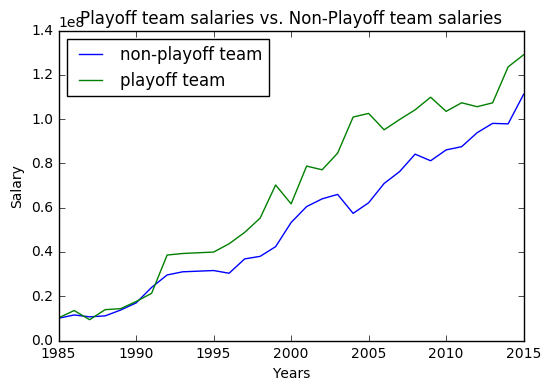

In [9]:
plt.plot(years, non_playoff_salaries, color= 'blue', label= 'non-playoff team')
plt.plot(years, playoff_salaries, color= 'green', label= 'playoff team')

plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Playoff team salaries vs. Non-Playoff team salaries')
plt.legend(loc = 'upper left')
plt.show()

### Why were the lines similar from 1985 to 1991?? (I'd probably say something along the lines of a growing gap between the amount teams were spending in the early 90s, maybe look at the min and max team salaries per year)

2004 yanks & sox both made it 300MM combined
extra wild card team? 8 vs 10 outliers effect on 8 teams will affect the mean // 8 playff vs 22 non-playoff ('04)
budgets much smaller
collusion scandal + ???

In [10]:
### this info doesnt' tell us much don't need it

#correlation of non-playoff teams salary/win
### print correlation(non_playoff_teams['salary'],non_playoff_teams['W']) 

### print correlation_by_year(non_playoff_teams, 1999)

for y in years:
    print "Year: " + str(y) + " " + str(correlation_by_year(non_playoff_teams, y))
    
# stronger correlation (pay for wins) among non-play vs playoff teams
# (perhaps due to less data for playoff teams)

Year: 1985 0.390069338578
Year: 1986 0.0389630098473
Year: 1987 -0.0583775317641
Year: 1988 0.0268155362867
Year: 1989 0.381760100022
Year: 1990 -0.069927987477
Year: 1991 0.401984060996
Year: 1992 -0.296277333926
Year: 1993 0.234175038761
Year: 1995 0.0174837579079
Year: 1996 0.269161561572
Year: 1997 0.106799895153
Year: 1998 0.545317419374
Year: 1999 0.140392869434
Year: 2000 0.416119967467
Year: 2001 0.278114834335
Year: 2002 0.4797174071
Year: 2003 0.276978299147
Year: 2004 0.216777389961
Year: 2005 0.203092660357
Year: 2006 0.549467757533
Year: 2007 0.504105930509
Year: 2008 0.284364865173
Year: 2009 0.198016286345
Year: 2010 0.346200697991
Year: 2011 0.385399051753
Year: 2012 0.189218870624
Year: 2013 0.463973012074
Year: 2014 0.124268315627
Year: 2015 0.292182909735


## Conclusion

### Add a bit more, maybe talk about the early 2000s and the Yankees and Red Sox payroll attributing to that huge gap between playoff teams salaries and non playoff team salaries, especially in 2004. Combined, the Yankees and Red Sox payroll was more than the 8 lowest teams payrolls combined!

In general, big payroll teams are more likely to win and make the playoffs.

The period from 1985 – 1996 saw relative parity for MLB teams.  Wins and salary are closely tied. 

The years 1996 – 2009 show an sustainable increase in that positive correlation, which peaks in the late 90’s and mid-2000’s.

From the 2005 – 2015 correlation settles back into the range seen in the mid-80’s and the league reverts to a more competitive pattern in terms of spending to achieve wins.  Extreme correlation of the mid-90’s no longer exists.

## Sources

* [http://www.fangraphs.com/blogs/relationship-between-spending-winning-remains-low/](http://www.fangraphs.com/blogs/relationship-between-spending-winning-remains-low/)
* [http://blog.philbirnbaum.com/2010/06/payroll-and-wins-and-correlation.html](http://blog.philbirnbaum.com/2010/06/payroll-and-wins-and-correlation.html)
* [http://www.hardballtimes.com/money-and-wins/](http://www.hardballtimes.com/money-and-wins/)